In [ ]:
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'

import sys
sys.path.insert(0,curr_dir)
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import itertools
from nilearn import image, plotting, datasets
from nilearn.datasets import load_mni152_brain_mask, load_mni152_template
import nibabel as nib
import pdb
import os
import ptoc_params as params

#hide warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_dir = params.data_dir
results_dir = params.results_dir
fig_dir = params.fig_dir

sub_info = params.sub_info
task_info = params.task_info

suf = params.suf
rois = params.rois
hemis = params.hemis

#load data summary
data_summary = pd.read_csv(f'{results_dir}/selectivity/selectivity_summary{suf}.csv')

#load subject info
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')

#extract just patients from group
#sub_info = sub_info[sub_info['group']=='patient']

#load mni mask
mni = load_mni152_brain_mask()


In [ ]:
##single subject

data_dir = params.data_dir
raw_dir = params.raw_dir  
sub = 'sub-069'

stats_file = 'derivatives/fsl/loc/HighLevel.gfeat/cope5.feat/stats/zstat1.nii.gz'


anat_dir = f"{raw_dir}/{sub}/ses-01"
anat = image.load_img(f"{anat_dir}/anat/{sub}_ses-01_T1w_brain.nii.gz")

sub_dir = f"{data_dir}/{sub}/ses-01"
func = image.load_img(f"{sub_dir}/{stats_file}")
plotting.plot_stat_map(func,bg_img = anat, threshold = 2.58, title = sub)
plt.show()
plt.pause(0.0001)

In [ ]:
##subject loop

data_dir = params.data_dir
raw_dir = params.raw_dir
sub_info = params.sub_info
#sub_info = sub_info.iloc[9:] #I am limiting the subjects to where the break happened this exludes lines above the number listed not including the number listed
stats_file = 'derivatives/fsl/loc/HighLevel.gfeat/cope3.feat/stats/zstat1.nii.gz'

#loop through subs in sub_info
for sub in sub_info['sub']: 
   
    #on each sub set the directory for the anatomical and func
    anat_dir = f"{raw_dir}/{sub}/ses-01"
    anat = image.load_img(f"{anat_dir}/anat/{sub}_ses-01_T1w_brain.nii.gz")
    sub_dir = f"{data_dir}/{sub}/ses-01"
    func = image.load_img(f"{sub_dir}/{stats_file}")
    
    #check if func file exists
    if os.path.exists(f"{sub_dir}/{stats_file}"):
        print("File exists.")
    else:
     print("File does not exist.") 
    
    #plot it
    plotting.plot_stat_map(func,bg_img = anat, threshold = 2.58, title = sub)
    plt.show()
    plt.pause(0.0001)

In [ ]:
#PLOT SINGLE SUBJECT MIRROR AND MASK

mirrored_brain = '/lab_data/behrmannlab/vlad/hemispace/sub-007/ses-01/anat/sub-007_ses-01_T1w_brain_mirrored.nii.gz'
brain_img = image.load_img(mirrored_brain)

hemi_mask = '/lab_data/behrmannlab/vlad/hemispace/sub-025/ses-01/anat/sub-025_ses-01_T1w_brain_mask_Left.nii.gz'
mask_img = image.load_img(hemi_mask)

plotting.plot_anat(brain_img, title='Mirrored Brain')
plotting.plot_anat(mask_img, title='masked hemi') #I want to try and plot the hemimask as well as the mirror file
plt.show()


In [ ]:
#PLOT MIRROR BRAINS FOR PATIENTS - LOOP
sub_info = params.sub_info  # Assuming params is a dictionary containing subject information

for sub in sub_info['sub']:
    mirrored_brain = f'/lab_data/behrmannlab/vlad/hemispace/{sub}/ses-01/anat/{sub}_ses-01_T1w_brain_mirrored.nii.gz'
    
    if os.path.exists(mirrored_brain):
        brain_img = image.load_img(mirrored_brain)
        title = f'Mirrored Brain - Subject {sub}'
        plotting.plot_anat(brain_img, title=title)
        plt.show()
    else:
        print(f"File not found for subject {sub}. Skipping...")
        
        

In [ ]:
#Plot hemi mask looped

sub_info = params.sub_info

for sub in sub_info['sub']:
    hemi = 'Left' # change to right if you want a right mask
    hemi_mask = f'/lab_data/behrmannlab/vlad/hemispace/{sub}/ses-01/anat/{sub}_ses-01_T1w_brain_mask_{hemi}.nii.gz'
    
    if os.path.exists(hemi_mask):
        mask_img = image.load_img(hemi_mask)
        title = f'hemi mask - {sub} {hemi}'
        plotting.plot_anat(mask_img, title=title)
        plt.show()
    else:
        print(f"File not found for subject {sub}. Skipping...")

In [ ]:
#Plot ROI individuals

study='ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"

roi_list = ["ventral_visual_cortex", "LO", "PFS", "dorsal_visual_cortex", "pIPS", "aIPS", "V1"] #added V1
#roi_dir = f"{study_dir}/{sub}/ses-01/derivatives/rois/parcels"

sub = 'sub-004'

def roi_plot(sub, roi_dir, roi_list):
    """
    Plot each ROI onto the patient's brain
    """
    print("Plotting ROIs for", sub)
    
    raw_dir = f"/lab_data/behrmannlab/vlad/hemispace"

    sub_dir = f'{raw_dir}/{sub}/ses-01'
    anat = f'{sub_dir}/anat/{sub}_ses-01_T1w_brain.nii.gz'
    
    for roi in roi_list:
        roi_file = f'{roi_dir}/{roi}.nii.gz'     
        if not os.path.exists(roi_file):
            print(f"ROI file not found: {roi_file}")
            continue
        
        roi_img = image.load_img(roi_file)
        roi_img_resampled = image.resample_to_img(roi_img, anat)

        plotting.plot_roi(roi_img_resampled, bg_img=anat, title=f"ROI: {roi} on: {sub}")
        plt.show()

sub_info = params.sub_info

all_subs = sub_info['sub'].values

for sub, hemi, group in zip(sub_info['sub'], sub_info['intact_hemi'], sub_info['group']):
    
    if sub[:4] != 'sub-':
        sub = 'sub-' + sub
    
    print(sub, hemi, group)
    # Update the roi_dir to include the current subject (sub)
    roi_dir = f"{study_dir}/{sub}/ses-01/derivatives/rois/parcels"
    roi_plot(sub, roi_dir, roi_list)

In [ ]:
'''''
Plot ROIs on each patient figure
'''''

l_row = -1
r_row = -1
n =0
z_coord = [30,30,45,30,30,30,30,55]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 12), facecolor='w')
for sub, code, hemi in zip(sub_info['sub'], sub_info['code'], sub_info['intact_hemi']):
    print(code)
    sub_dir = f'{raw_dir}/{sub}/ses-01'

    if hemi == 'left':
        hemi_col = 0
        l_row = l_row +1
        row = l_row
        xcoord = -25
    else:
        hemi_col = 1
        r_row = r_row + 1
        row = r_row
        xcoord = 25

    #load anatomical
    anat = image.load_img(f'{sub_dir}/anat/{sub}_ses-01_T1w_brain.nii.gz')

    hemi_mask = image.load_img(f'{sub_dir}/anat/{sub}_ses-01_T1w_brain_mask_{hemi}.nii.gz')
    
    #load rois
    ventral_roi = image.load_img(f'{sub_dir}/derivatives/rois/parcels/ventral_visual_cortex.nii.gz')
    dorsal_roi = image.load_img(f'{sub_dir}/derivatives/rois/parcels/dorsal_visual_cortex.nii.gz')

    #combine rois
    roi = image.math_img('a+b', a=ventral_roi, b=dorsal_roi)
    #multiple by hemi mask
    roi = image.math_img('a*b', a=roi, b=hemi_mask)

    #binarize mask
    roi = image.math_img('img > 0', img=roi)

    display = plotting.plot_roi(roi, bg_img = anat,draw_cross = False, cut_coords = (xcoord,-50,z_coord[n]), axes=ax[row,hemi_col])

    ax[row,hemi_col].title.set_text(f'Patient {code}')

    n = n+1

#display.savefig(f'{fig_dir}/anatomicals_head.jpg') 
plt.show()

    



In [ ]:
func = image.load_img(f"{sub_dir}/{stats_file}")
plotting.view_img(func,bg_img = anat, threshold = 2.58)

In [ ]:
plotting.plot_anat(anat, dim = -1)

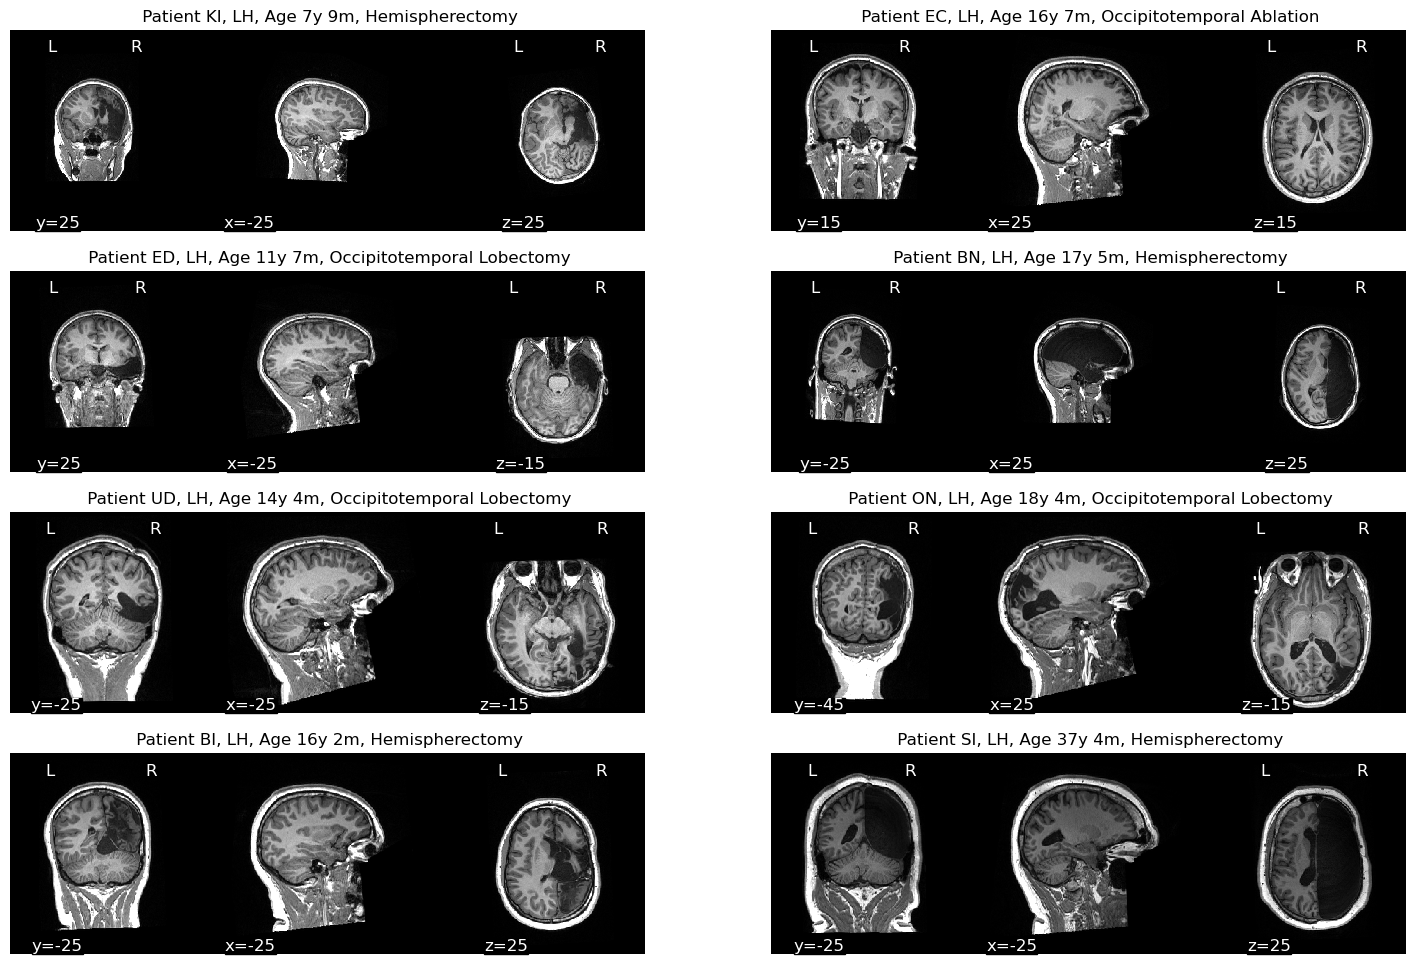

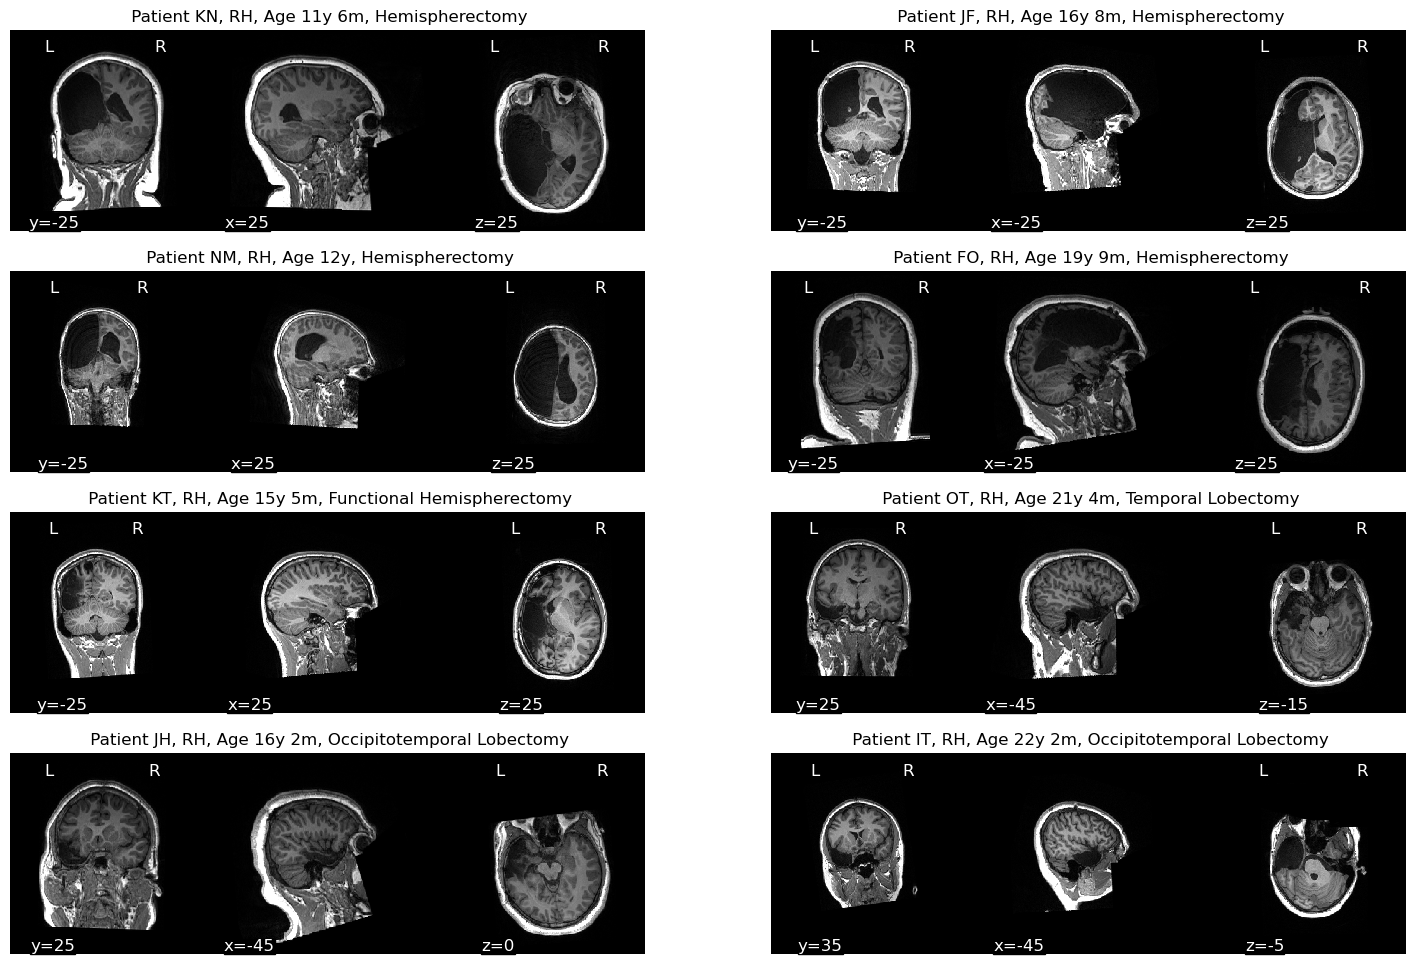

In [16]:
"""
Plot anatomical data: Select Subjects for Behavioral
"""

def plot_subject(sub_code, hemi, dim_val, ax, code, group, xcoord=None, ycoord=None, zcoord=None):
    sub_dir = f'{raw_dir}/{sub_code}/ses-01'
    anat = image.load_img(f'{sub_dir}/anat/{sub_code}_ses-01_T1w.nii.gz')
    
    if xcoord is None:
        xcoord = 25 if hemi == 'left' else -25
    
    if ycoord is None:
        ycoord = -25
    
    if zcoord is None:
        zcoord = 25
    
    display = plotting.plot_anat(anat, cut_coords=(xcoord, ycoord, zcoord), draw_cross=False, dim=dim_val, axes=ax)
    ax.title.set_text(f'{group} {code}')

import matplotlib.pyplot as plt

#dim_vals = [-1.25, -1.25, -1.25, -1.25]
dim_vals = [-1.25, -1.25, -1.25, -1.25, -1.25, -1.25, -1.25, -1.25]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 12), facecolor='w')
fig2, ax2 = plt.subplots(nrows=4, ncols=2, figsize=(18, 12), facecolor='w')


# Subject codes and their corresponding hemispheres and coordinates

# Intact RIGHT: sub-007, sub-076, sub-090, sub-092, sub-099, sub-066, sub-069, sub-078
# Intact LEFT: sub-089, sub-098, sub-101, sub-004, sub-075, sub-077, sub-079, sub-091 

left_patients = [
    ('sub-077','right', -25, 25, 25),
    ('sub-079','left', 25, 15, 15),
    ('sub-075','left', -25, 25, -15),
    ('sub-101', 'left'),
    ('sub-004','right', -25,-25,-15),
    ('sub-089', 'left', 25, -45, -15), 
    ('sub-098', 'right', -25, -25, 25), 
    ('sub-091', 'right') 
]
 
right_patients = [
    ('sub-099', 'left'),
    ('sub-066', 'right'),
    ('sub-069', 'left'),
    ('sub-092', 'right'),
    ('sub-090', 'left'),
    ('sub-007', 'left', -45, 25, -15),
    ('sub-076', 'right', -45, 25, 0),
    ('sub-078', 'right', -45, 35, -5)
]

controls = [
    ('sub-038', 'right', -25),
    ('sub-057', 'right', -25),
    ('sub-093', 'right', -25),
    ('sub-094', 'right', -25),
]

# Add individual titles for controls
#control_titles = ['1', '2', '3', '4']

#for i, (sub_code, hemi, *coords) in enumerate(controls):  # Use *coords to handle optional xcoord, ycoord, and zcoord
#    xcoord, ycoord, zcoord = coords if len(coords) == 3 else (None, None, None)
#    plot_subject(sub_code, hemi, dim_vals[i], ax[i, 0], control_titles[i], 'Control', xcoord, ycoord, zcoord)

left_titles = [
    'Patient KI, LH, Age 7y 9m, Hemispherectomy',
    'Patient EC, LH, Age 16y 7m, Occipitotemporal Ablation', 
    'Patient ED, LH, Age 11y 7m, Occipitotemporal Lobectomy',
    'Patient BN, LH, Age 17y 5m, Hemispherectomy', 
    'Patient UD, LH, Age 14y 4m, Occipitotemporal Lobectomy', 
    'Patient ON, LH, Age 18y 4m, Occipitotemporal Lobectomy', 
    'Patient BI, LH, Age 16y 2m, Hemispherectomy',
    'Patient SI, LH, Age 37y 4m, Hemispherectomy'
 ]

right_titles = [
    'Patient KN, RH, Age 11y 6m, Hemispherectomy', 
    'Patient JF, RH, Age 16y 8m, Hemispherectomy', 
    'Patient NM, RH, Age 12y, Hemispherectomy',
    'Patient FO, RH, Age 19y 9m, Hemispherectomy',
    'Patient KT, RH, Age 15y 5m, Functional Hemispherectomy',
    'Patient OT, RH, Age 21y 4m, Temporal Lobectomy', 
    'Patient JH, RH, Age 16y 2m, Occipitotemporal Lobectomy',
    'Patient IT, RH, Age 22y 2m, Occipitotemporal Lobectomy'
]

for i, (sub_code, hemi, *coords) in enumerate(left_patients):
    xcoord, ycoord, zcoord = coords if len(coords) == 3 else (None, None, None)
    row = i // 2  # Calculate the row for the current subject (0-3)
    col = i % 2  # Calculate the column for the current subject (0 or 1)
    plot_subject(sub_code, hemi, dim_vals[i], ax[row, col], left_titles[i], '', xcoord, ycoord, zcoord)

for i, (sub_code, hemi, *coords) in enumerate(right_patients):
    xcoord, ycoord, zcoord = coords if len(coords) == 3 else (None, None, None)
    row = i // 2  # Calculate the row for the current subject (0-3)
    col = i % 2  # Calculate the column for the current subject (0 or 1)
    plot_subject(sub_code, hemi, dim_vals[i], ax2[row, col], right_titles[i], '', xcoord, ycoord, zcoord)

dpi = 300

fig.savefig('left_patients.png', dpi=dpi, bbox_inches='tight')
fig2.savefig('right_patients.png', dpi=dpi, bbox_inches='tight')
    
plt.show()
plt.pause(0.0001)

In [ ]:
"""
Plot anatomical data: ALL CONTROL Subjects for Behavioral saved in HEMISPACE

FUNCTIONAL
"""

import os
import matplotlib.pyplot as plt

# Define a list of dim_vals to match the number of control subjects
dim_vals = [-1.25] * len(control_subjects)

# Define a list of control subjects
control_subjects = [
    'sub-025',
    'sub-038',
    'sub-064',
    'sub-083',
    'sub-084',
    'sub-085',
    'sub-087',
    'sub-088',
    'sub-093',
    'sub-094',
    'sub-095',
    'sub-096',
    'sub-097'
]

for sub_code in control_subjects:
    # Create a new figure for each subject
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3), facecolor='w')

    xcoord, ycoord, zcoord = None, None, None  # You can set custom coordinates if needed
    control_title = f'{sub_code}'  # Use the subject code as the title
    
    plot_subject(sub_code, 'right', dim_vals[control_subjects.index(sub_code)], ax, control_title, 'Control', xcoord, ycoord, zcoord)

    plt.show()
    plt.pause(0.0001)
    plt.savefig(f'{fig_dir}/control_{sub_code}.jpg')


In [ ]:
#plot single glass brains

task = 'loc'
cope = "3"

for sub, group in zip(sub_info['sub'], sub_info['group']):
    sub_dir = f'{data_dir}/{sub}/ses-01'

    
    #register each highlevel to anat
    zstat_path = f'{sub_dir}/derivatives/fsl/{task}/HighLevel.gfeat/cope{cope}.feat/stats/zstat1_reg.nii.gz'

    #check if zstat exists
    if os.path.exists(zstat_path):
        #load zstat
        zstat = image.load_img(zstat_path)
        #zstat = image.clean_img(zstat,mask_img=mni)
        plotting.plot_glass_brain(zstat, threshold = 3.1, draw_cross = False, colorbar = True, title = f'{sub}')
        
        #add title
        plt.title(f'{sub} {group}')

        plt.show()
        plt.pause(0.0001)

In [ ]:
# create a figure with multiple axes to plot each anatomical image

def plot_glass_brain(subs, exp):
    fig, axes = plt.subplots(nrows=len(all_subs), ncols=1, figsize=(9, 25))


    # axes is a 2 dimensional numpy array
    for axn, ax in enumerate(axes.flatten()):
        display = plotting.plot_glass_brain(all_subs[axn], axes=ax, threshold = 3.1, draw_cross = False, colorbar = True)

        ax.title.set_text(f'Subject {axn + 1}')

    plt.show()
    display.savefig(f'{fig_dir}/{exp}_glassbrain.png')   
    plt.pause(0.0001)

    # save the output figure with all the anatomical images
    #fig.savefig("my_test_img.png")

plot_glass_brain(sub_info['sub'], 'loc')

In [ ]:
"""
Plot functional data on glass brain
"""
task = 'loc'
code = ""
cope = "3"
fig_dir = '/user_data/csimmon2/git_repos/ptoc/results/figures'


print(thresh)
os.makedirs(f'{fig_dir}/glass_brain', exist_ok=True)
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(18, 12))

l_row = -1
r_row = -1
for sub, hemi in zip(sub_info['sub'], sub_info['intact_hemi']):
    sub_dir = f'{data_dir}/{sub}/ses-01'

    print(hemi)


    if hemi == 'left':
        hemi_col = 0
        l_row = l_row +1
        row = l_row
    else:
        hemi_col = 1
        r_row = r_row + 1
        row = r_row
    
    #register each highlevel to anat
    zstat_path = f'{sub_dir}/derivatives/fsl/{task}/HighLevel.gfeat/cope{cope}.feat/stats/zstat1_reg.nii.gz'

    #check if zstat exists
    if os.path.exists(zstat_path):
        #load zstat
        zstat = image.load_img(zstat_path)
        #
        zstat = image.threshold_img(zstat,thresh, cluster_threshold=5, two_sided=False)
        #zstat = image.clean_img(zstat,mask_img=mni)
        #create figure

        display = plotting.plot_glass_brain(zstat, axes=ax[row,hemi_col],threshold = thresh, draw_cross = False, colorbar = True)
        ax[row,hemi_col].title.set_text(f'Patient {sub}')

    else:
        display = plotting.plot_glass_brain(mni, axes=ax[row,hemi_col],threshold = thresh, draw_cross = False, colorbar = True)
        ax[row,hemi_col].title.set_text(f'Patient {sub}')
        

display.savefig(f'{fig_dir}/glass_brain/glass_brain.png') 
plt.show()
plt.pause(0.0001)

              